# Results on Synthetic Datasets (MNIST-like)

In [2]:
from metric import compute_metric_synth
from plot_utils import plot_all_synth, plot_all_synth_aggregated, compute_correlations_synth
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.lines import Line2D
import itertools
import torch
import scipy as sp
import pickle

## Compute results

In [ ]:
layer = 'fpn_ms'
logme_df, bbox_logme_df = compute_metric_synth(metric = 'label_LogME', layer = layer)
xy_logme_df, bbox_xy_logme_df = compute_metric_synth(metric = 'xy_LogME', layer = layer)
xy_logme_rel_df, bbox_xy_logme_rel_df = compute_metric_synth(metric = 'xy_LogME_rel', layer = layer)
hscore_df, bbox_hscore_df = compute_metric_synth(metric = 'hscore', layer = layer)
regularized_hscore_df, bbox_regularized_hscore_df = compute_metric_synth(metric = 'regularized_hscore', layer = layer)
transrate_df, bbox_transrate_df = compute_metric_synth(metric = 'transrate', layer = layer)

datasets = ['MNIST','KMNIST', 'EMNIST', 'FASHION_MNIST', 'USPS']
total_logme_df = pd.DataFrame((logme_df.to_numpy() + xy_logme_df.to_numpy())/2 , index = datasets, columns = datasets)
bbox_total_logme_df = pd.DataFrame((bbox_logme_df.to_numpy() + bbox_xy_logme_df.to_numpy())/2 , index = datasets, columns = datasets)
total_logme_rel_df = pd.DataFrame((logme_df.to_numpy() + xy_logme_rel_df.to_numpy())/2 , index = datasets, columns = datasets)
bbox_total_logme_rel_df = pd.DataFrame((bbox_logme_df.to_numpy() + bbox_xy_logme_rel_df.to_numpy())/2 , index = datasets, columns = datasets)

#Retrieve map
df_map_95 = np.zeros((len(synth_datasets), len(synth_datasets)))
np.fill_diagonal(df_map_95, np.nan)
df_map_95 = pd.DataFrame(df_map_95, index = synth_datasets, columns= synth_datasets)
vers = 0
for dataset_source, dataset_target in itertools.permutations(synth_datasets, 2):
    dir = f"/path/to/model/{dataset_source}/from_{dataset_target}/" 
    eval_logger = pickle.load(open(dir + f"{dataset_source}_evaliter_{vers}.pkl" , "rb"))
    mAP = max(eval_logger['mAP_05_95'])
    df_map_95.loc[dataset_source, dataset_target] = mAP

In [3]:
df_map_95 = pd.read_csv('/path/to/results/synth_map_95.csv', header = 0, index_col =0)
logme_df = pd.read_csv('/path/to/results/synth_logme.csv', header = 0, index_col= 0)
bbox_logme_df = pd.read_csv('/path/to/results/synth_bbox_logme.csv', header = 0, index_col= 0)
xy_logme_df = pd.read_csv('/path/to/results/synth_logme.csv', header = 0, index_col= 0)
bbox_xy_logme_df = pd.read_csv('/path/to/results/synth_bbox_logme.csv', header = 0, index_col= 0)
total_logme_df = pd.read_csv('/path/to/results/synth_total_logme.csv', header = 0, index_col= 0)
bbox_total_logme_rel_df = pd.read_csv('/path/to/results/synth_bbox_total_logme_rel.csv', header = 0, index_col= 0)
total_logme_rel_df = pd.read_csv('/path/to/results/synth_total_logme_rel.csv', header = 0, index_col= 0)
bbox_total_logme_df = pd.read_csv('/path/to/results/synth_bbox_total_logme.csv', header = 0, index_col= 0)
hscore_df = pd.read_csv('/path/to/results/synth_hscore.csv', header = 0, index_col= 0)
bbox_hscore_df = pd.read_csv('/path/to/results/synth_bbox_hscore.csv', header = 0, index_col= 0)
regularized_hscore_df = pd.read_csv('/path/to/results/synth_regularized_hscore.csv', header = 0, index_col= 0)
bbox_regularized_hscore_df = pd.read_csv('/path/to/results/synth_bbox_regularized_hscore.csv', header = 0, index_col= 0)
transrate_df = pd.read_csv('/path/to/results/synth_transrate.csv', header = 0, index_col= 0)
bbox_transrate_df = pd.read_csv('/path/to/results/synth_bbox_transrate.csv', header = 0, index_col= 0)

## Correlation table for map all IoUs fpn_ms
### 1. Source selection

In [5]:
layer = 'fpn_ms'
logme_df, bbox_logme_df = compute_metric_synth(metric = 'label_LogME', layer = layer)
xy_logme_df, bbox_xy_logme_df = compute_metric_synth(metric = 'xy_LogME', layer = layer)
hscore_df, bbox_hscore_df = compute_metric_synth(metric = 'hscore', layer = layer)
regularized_hscore_df, bbox_regularized_hscore_df = compute_metric_synth(metric = 'regularized_hscore', layer = layer)
transrate_df, bbox_transrate_df = compute_metric_synth(metric = 'transrate', layer = layer)

datasets = ['MNIST','KMNIST', 'EMNIST', 'FASHION_MNIST', 'USPS']
total_logme_df = pd.DataFrame((logme_df.to_numpy() + xy_logme_df.to_numpy())/2 , index = datasets, columns = datasets)
bbox_total_logme_df = pd.DataFrame((bbox_logme_df.to_numpy() + bbox_xy_logme_df.to_numpy())/2 , index = datasets, columns = datasets)

/data/home/lfouquet/auto_transfer_learning/metric.py:77: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, F), array(float64, 1d, A))
  tmp = (vh @ (f @ y_))
/home/lfouquet/auto_transfer_learning/env_autotl/lib/python3.6/site-packages/numba/core/typing/npydecl.py:937: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (array(float64, 2d, F), array(float64, 1d, A))
  warnings.warn(NumbaPerformanceWarning(msg))


In [6]:
metric_dfs = [logme_df, xy_logme_df, total_logme_df, hscore_df, regularized_hscore_df, transrate_df]
bbox_metric_dfs = [bbox_logme_df, bbox_xy_logme_df, bbox_total_logme_df, bbox_hscore_df, bbox_regularized_hscore_df, bbox_transrate_df]
metric_names = ['LogME', 'XY_LogME', 'Total LogME', 'H-Score', 'H-Score*', 'TransRate']
df_source = compute_correlations_synth(df_map_95, metric_dfs, bbox_metric_dfs , metric_names, selection = 'source')
df_source.to_csv('/path/to/results/synt_summary_source_fpn_ms.csv')
df_source

Duplicates                                                  \
                     LogME XY_LogME Total LogME H-Score H-Score* TransRate   
 Target dataset                                                              
MNIST                -0.39    -0.77       -0.80    0.99    -0.38     -0.53   
KMNIST                0.98    -0.06        0.13    0.15     0.93     -0.89   
EMNIST                0.29     0.70        0.74    0.73     0.47     -0.68   
FASHION_MNIST        -0.27     0.76        0.76    0.19     0.78     -0.11   
USPS                  0.26     0.69        0.74    0.05     0.12     -0.32   

                 Bbox                                                  
                LogME XY_LogME Total LogME H-Score H-Score* TransRate  
 Target dataset                                                        
MNIST           -0.18     0.62       -0.13    0.95    -0.15     -0.20  
KMNIST           0.60    -0.23        0.90   -0.47     0.73      0.86  
EMNIST           1.00    -0.70        0.84    0.96     0.96      0.59  
FASHION_MNIST    0.77     0.25        0.53    0.34     0.59     -0.40  
USPS             0.31     0.33        0.33    0.01     0.30      0.22

### 2. Target selection

In [25]:
df_target = compute_correlations_synth(df_map_95, metric_dfs, bbox_metric_dfs , metric_names, selection = 'target')
df_target.to_csv('/path/to/results/synt_summary_target_fpn_ms.csv')
df_target

Duplicates                                                  \
                     LogME XY_LogME Total LogME H-Score H-Score* TransRate   
 Source dataset                                                              
MNIST                -0.62     0.45       -0.39   -0.41     0.44     -0.53   
KMNIST               -0.57     0.10       -0.57   -0.61    -0.93     -0.02   
EMNIST                0.88     0.08        0.71    0.68     0.99     -0.28   
FASHION_MNIST         0.04     0.52        0.09    0.17     0.89     -0.75   
USPS                 -0.29     0.49       -0.02   -0.02     0.66     -0.61   

                 Bbox                                                  
                LogME XY_LogME Total LogME H-Score H-Score* TransRate  
 Source dataset                                                        
MNIST            0.22     0.58        0.30   -0.63     0.52     -0.27  
KMNIST          -0.83     0.25       -0.90   -0.60    -0.97     -0.82  
EMNIST           0.97    -0.08        1.00    0.49     0.98      0.86  
FASHION_MNIST    0.77    -0.20        0.81   -0.16     0.91      0.61  
USPS             0.46     0.35        0.52   -0.20     0.65      0.20

## Aggregated Results

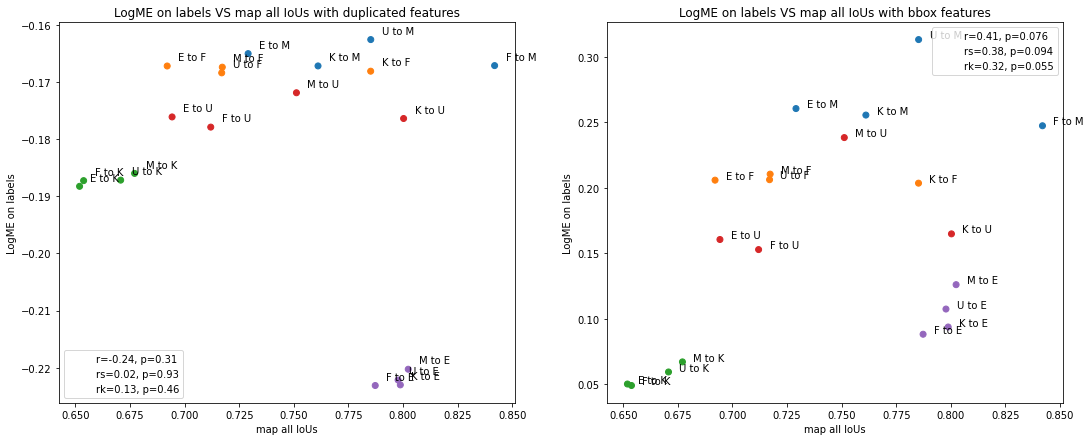

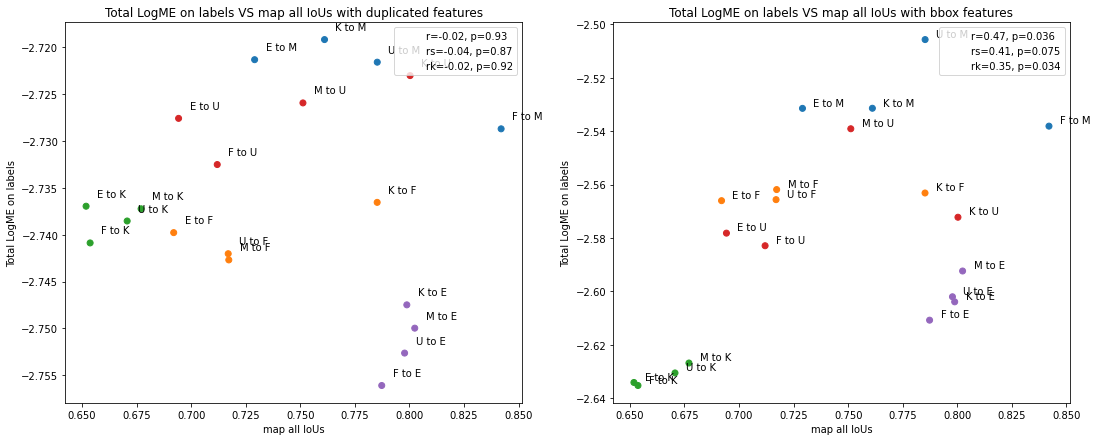

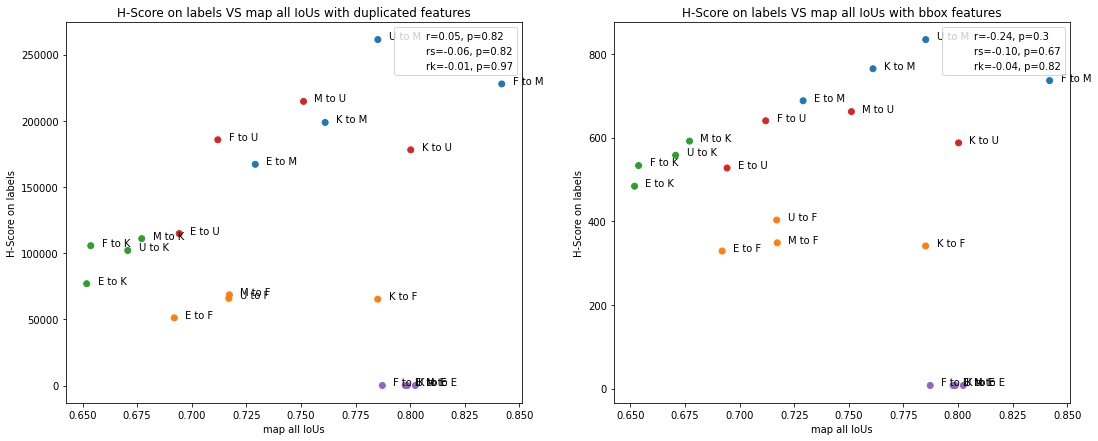

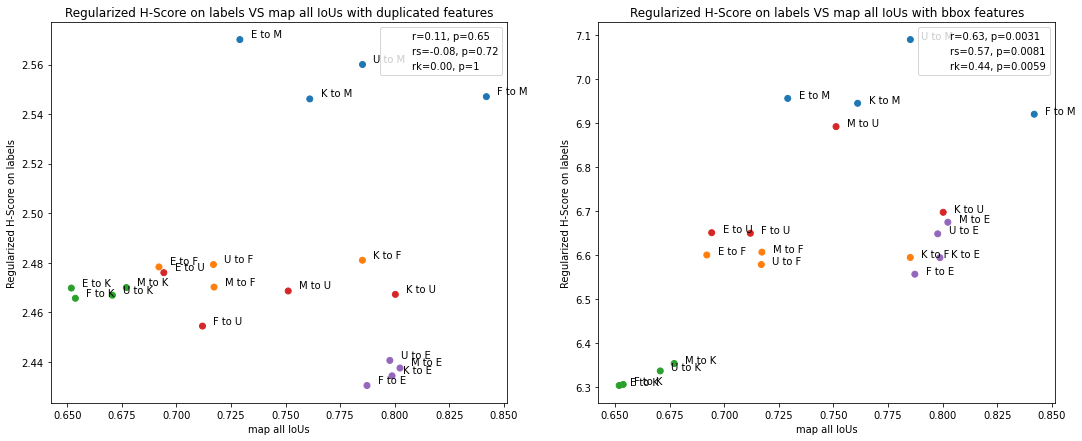

In [86]:
plot_all_synth_aggregated(df_map_95, logme_df, bbox_logme_df, x_label = 'map all IoUs', y_label = 'LogME on labels')
plot_all_synth_aggregated(df_map_95, total_logme_df, bbox_total_logme_df, x_label = 'map all IoUs', y_label = 'Total LogME on labels')
plot_all_synth_aggregated(df_map_95, hscore_df, bbox_hscore_df, x_label = 'map all IoUs', y_label = 'H-Score on labels')
plot_all_synth_aggregated(df_map_95, regularized_hscore_df, bbox_regularized_hscore_df, x_label = 'map all IoUs', y_label = 'Regularized H-Score on labels')